# 🌳 Tree Census in New York City

## Exploratory Data Analysis (EDA)

**Datasets source: [Kaggle](https://www.kaggle.com/datasets/nycparks/tree-census/data)**

**Explore patterns, trends, and relationships in the cleaned dataset using statistical summaries and visualizations.**

### Import Python libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
data = {
    1995: "1995_trees.csv",
    2005: "2005_trees.csv",
    2015: "2015_trees.csv",
}

df95 = pd.read_csv(data[1995])
df05 = pd.read_csv(data[2005])
df15 = pd.read_csv(data[2015])

df_all = pd.concat([df95, df05, df15], ignore_index=True)

### Data Analysis

Boroughs in 1995 dataset: ['Queens' 'Bronx' 'Staten Island' 'Brooklyn' 'Manhattan']


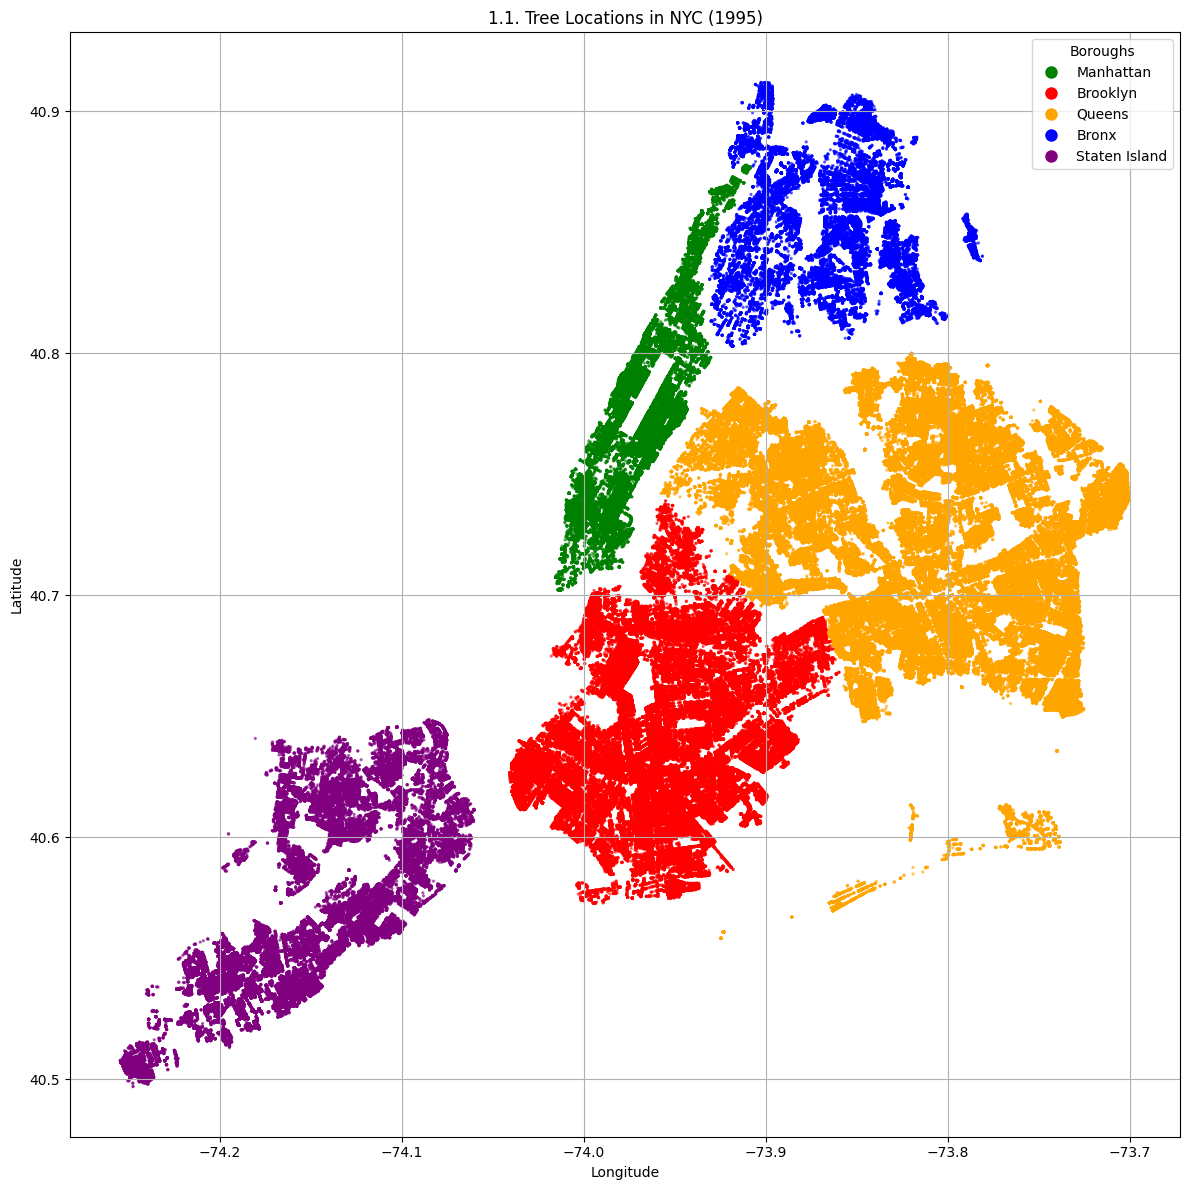

In [3]:
boroughs = df95['borough'].unique()
print("Boroughs in 1995 dataset:", boroughs)

borough_colors = {
    'Manhattan': 'green',
    'Brooklyn': 'red',
    'Queens': 'orange',
    'Bronx': 'blue',
    'Staten Island': 'purple'
}

colors = df95['borough'].map(borough_colors)

plt.figure(figsize=(12, 12))
plt.scatter(df95['longitude'], df95['latitude'], c=colors, s=2, alpha=0.5)
plt.title('1.1. Tree Locations in NYC (1995)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=borough, markerfacecolor=color, markersize=10) 
    for borough, color in borough_colors.items()],
    title='Boroughs', loc='upper right')

plt.grid()
plt.tight_layout()

plt.show()

Boroughs in 2005 dataset: ['Queens' 'Brooklyn' 'Manhattan' 'Bronx']


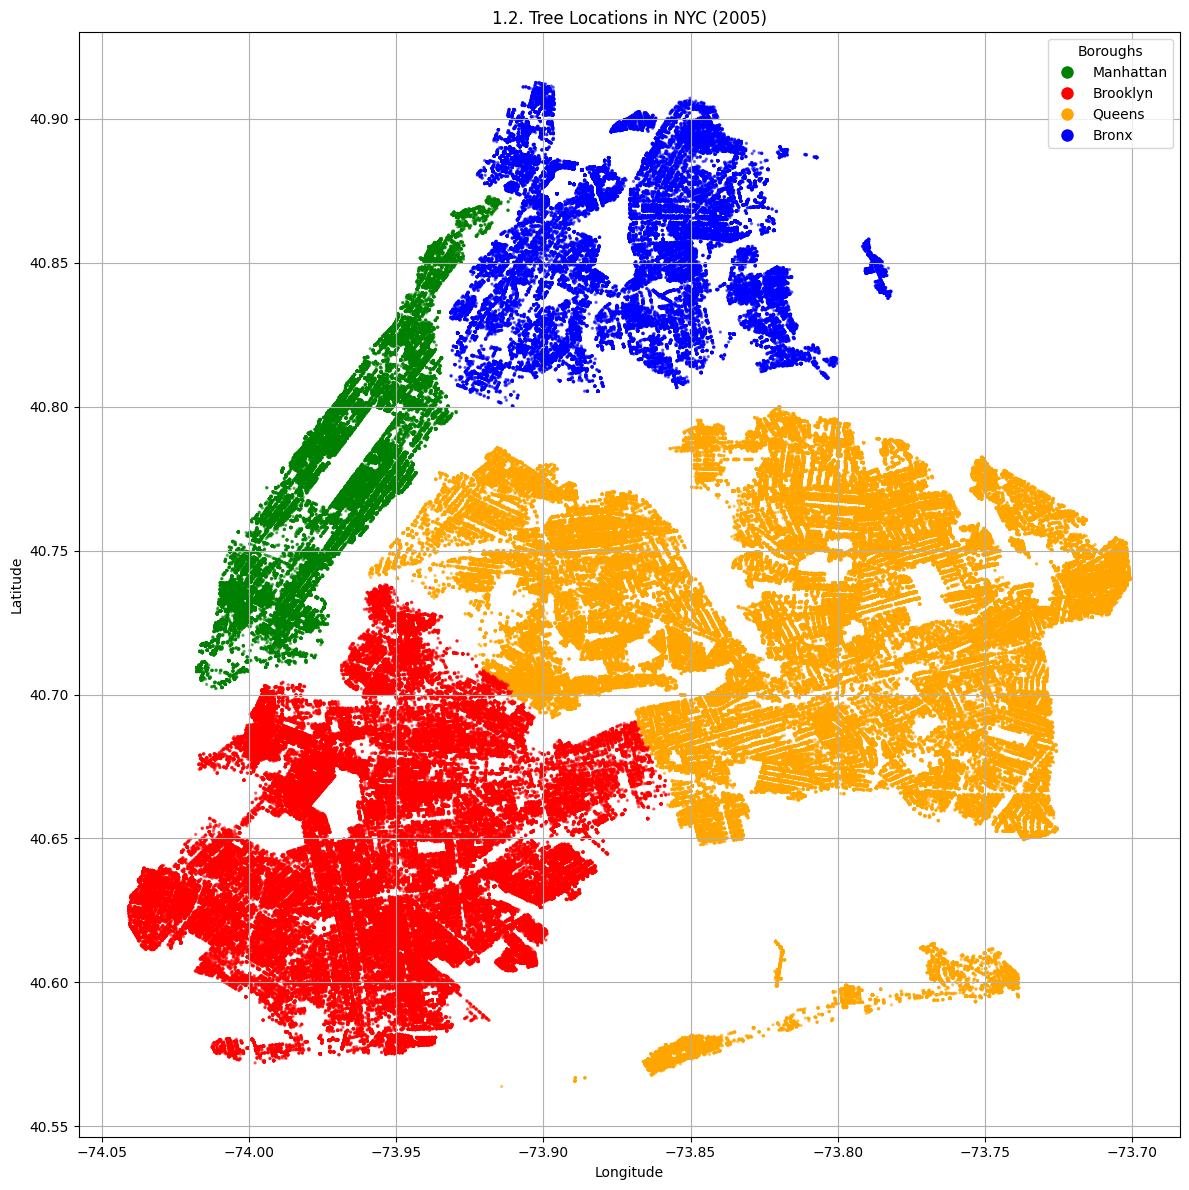

In [4]:
boroughs = df05['borough'].unique()
print("Boroughs in 2005 dataset:", boroughs)

borough_colors = {
    'Manhattan': 'green',
    'Brooklyn': 'red',
    'Queens': 'orange',
    'Bronx': 'blue',
}

colors = df05['borough'].map(borough_colors)

plt.figure(figsize=(12, 12))
plt.scatter(df05['longitude'], df05['latitude'], c=colors, s=2, alpha=0.5)
plt.title('1.2. Tree Locations in NYC (2005)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=borough, markerfacecolor=color, markersize=10) 
    for borough, color in borough_colors.items()],
    title='Boroughs', loc='upper right')

plt.grid()
plt.tight_layout()

plt.show()

Boroughs in 2015 dataset: ['Queens' 'Brooklyn' 'Manhattan' 'Bronx' 'Staten Island']


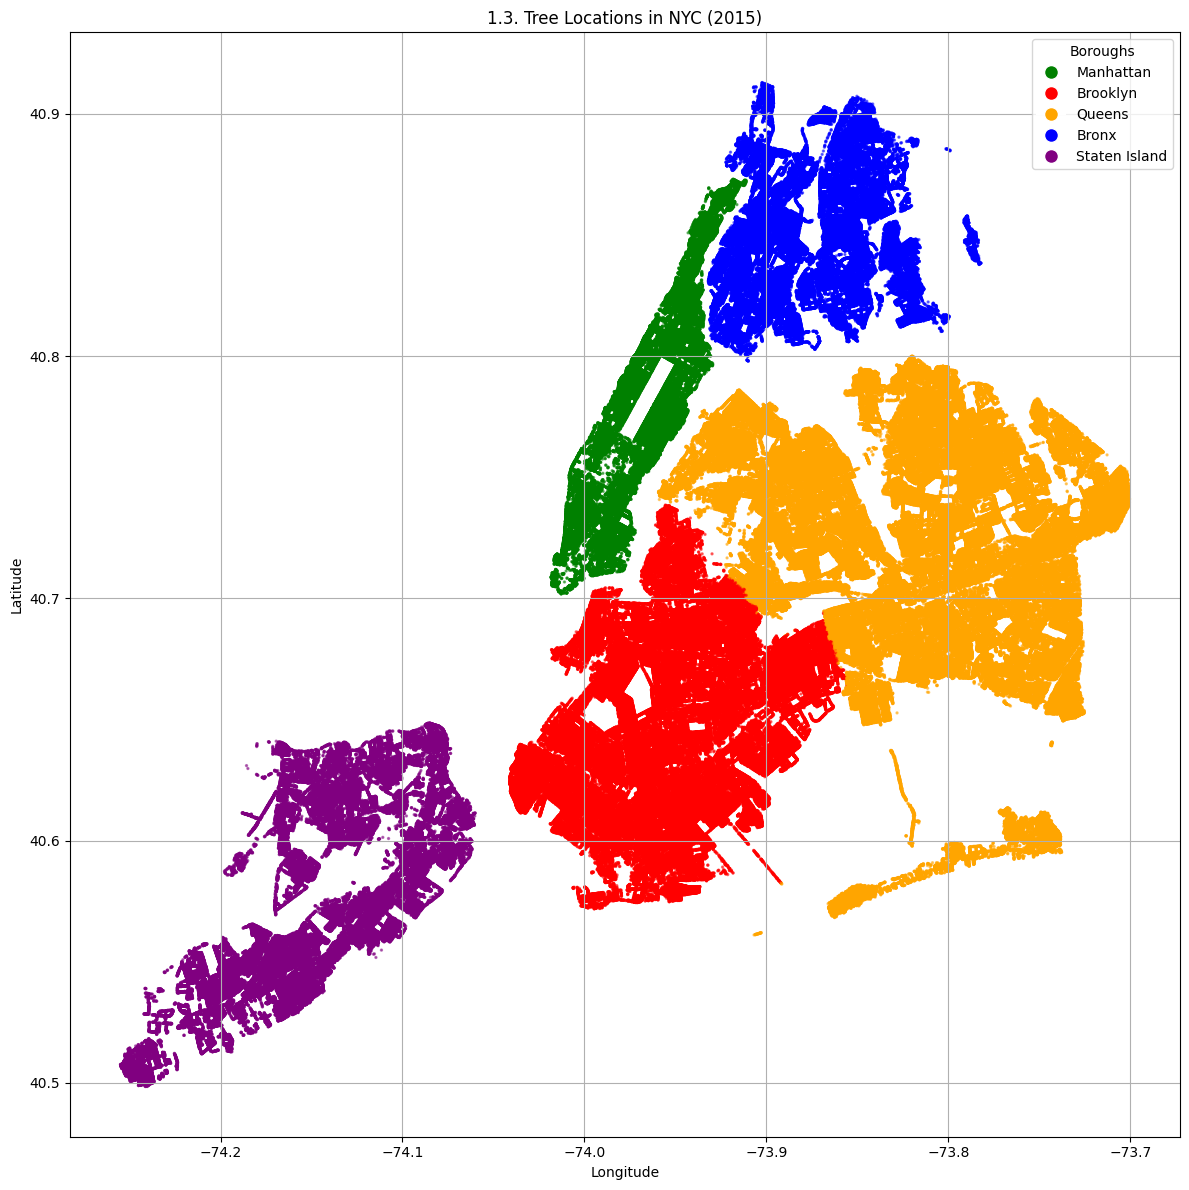

In [5]:
boroughs = df15['borough'].unique()
print("Boroughs in 2015 dataset:", boroughs)

borough_colors = {
    'Manhattan': 'green',
    'Brooklyn': 'red',
    'Queens': 'orange',
    'Bronx': 'blue',
    'Staten Island': 'purple'
}

colors = df15['borough'].map(borough_colors)

plt.figure(figsize=(12, 12))
plt.scatter(df15['longitude'], df15['latitude'], c=colors, s=2, alpha=0.5)
plt.title('1.3. Tree Locations in NYC (2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=borough, markerfacecolor=color, markersize=10) 
    for borough, color in borough_colors.items()],
    title='Boroughs', loc='upper right')

plt.grid()
plt.tight_layout()

plt.show()

Tree counts per borough over the years:
              1995    2005    2015
borough                          
Bronx       39693   56023   80584
Brooklyn   112031  139152  169743
Manhattan   43613   48341   62427
Queens     190728  228238  237970


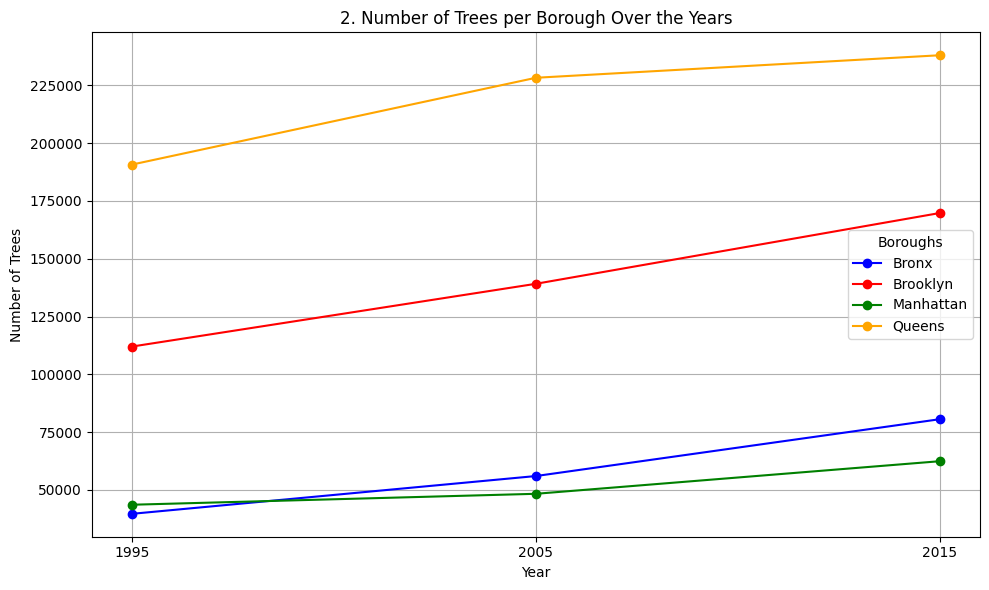

In [6]:
tree_counts = {
    1995: df95[df95['borough'] != "Staten Island"]['borough'].value_counts(),
    2005: df05[df05['borough'] != "Staten Island"]['borough'].value_counts(),
    2015: df15[df15['borough'] != "Staten Island"]['borough'].value_counts(),
}

tree_counts_df = pd.DataFrame(tree_counts).fillna(0).astype(int)
years = list(tree_counts.keys())
print("Tree counts per borough over the years:\n", tree_counts_df)

borough_colors = {
    'Manhattan': 'green',
    'Brooklyn': 'red',
    'Queens': 'orange',
    'Bronx': 'blue'
}

plt.figure(figsize=(10, 6))

for borough in tree_counts_df.index:
    plt.plot(tree_counts_df.columns, tree_counts_df.loc[borough], marker='o', label=borough, color=borough_colors.get(borough, 'black'))

plt.title('2. Number of Trees per Borough Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Trees')
plt.legend(title='Boroughs')

plt.xticks(years, years)
plt.grid()
plt.tight_layout()

plt.show()

Top 10 tree species in NYC (all years):
 spc_common
LONDON PLANETREE      241880
MAPLE NORWAY          161250
HONEYLOCUST           141043
OAK PIN                66529
PEAR CALLERY           65986
CALLERY PEAR           58931
PIN OAK                53185
LINDEN LITTLE LEAF     48698
GINKGO                 48421
NORWAY MAPLE           34189
Name: count, dtype: int64


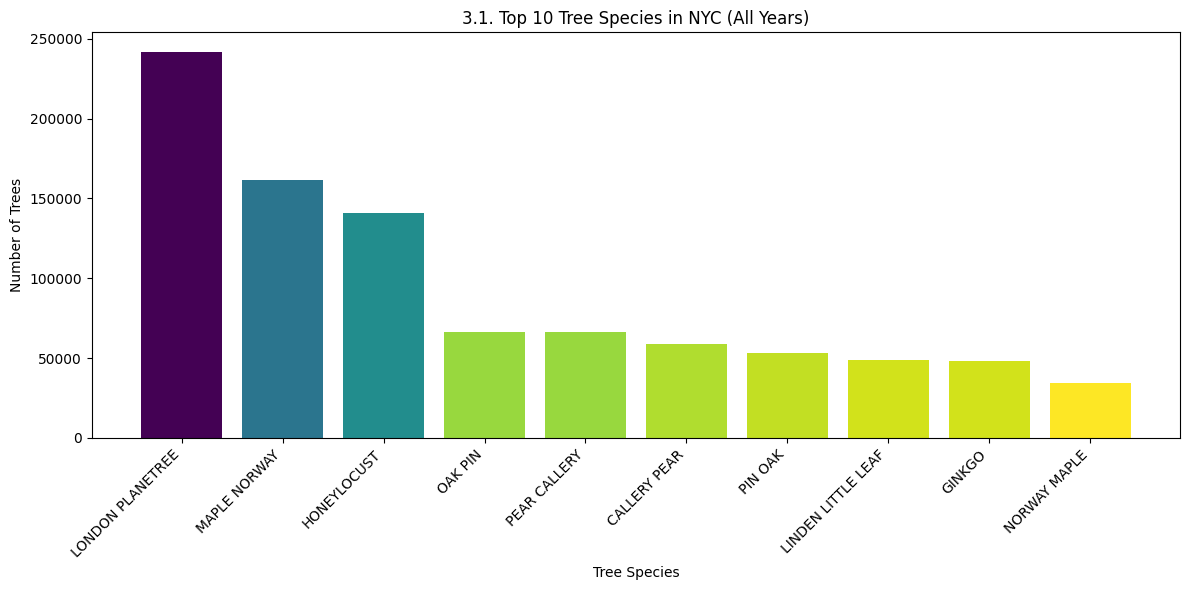

In [7]:
counts = df_all['spc_common'].value_counts().head(10)
top10_species = counts.index
print("Top 10 tree species in NYC (all years):\n", counts)

cmap = plt.cm.viridis_r
norm = plt.Normalize(counts.min(), counts.max())
colors = cmap(norm(counts.values))

plt.figure(figsize=(12, 6))

plt.bar(top10_species, counts.values, color=colors)
plt.title('3.1. Top 10 Tree Species in NYC (All Years)')
plt.xlabel('Tree Species')
plt.ylabel('Number of Trees')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

Top 10 Tree Species in NYC by Year:
               Species   1995   2005   2015
0    LONDON PLANETREE  78172  76694  87014
1        MAPLE NORWAY  96502  64748      0
2         HONEYLOCUST  30201  46580  64262
3             OAK PIN  31484  35045      0
4        PEAR CALLERY  28323  37663      0
5        CALLERY PEAR      0      0  58931
6             PIN OAK      0      0  53185
7  LINDEN LITTLE LEAF  23607  25091      0
8              GINKGO  12230  15167  21024
9        NORWAY MAPLE      0      0  34189


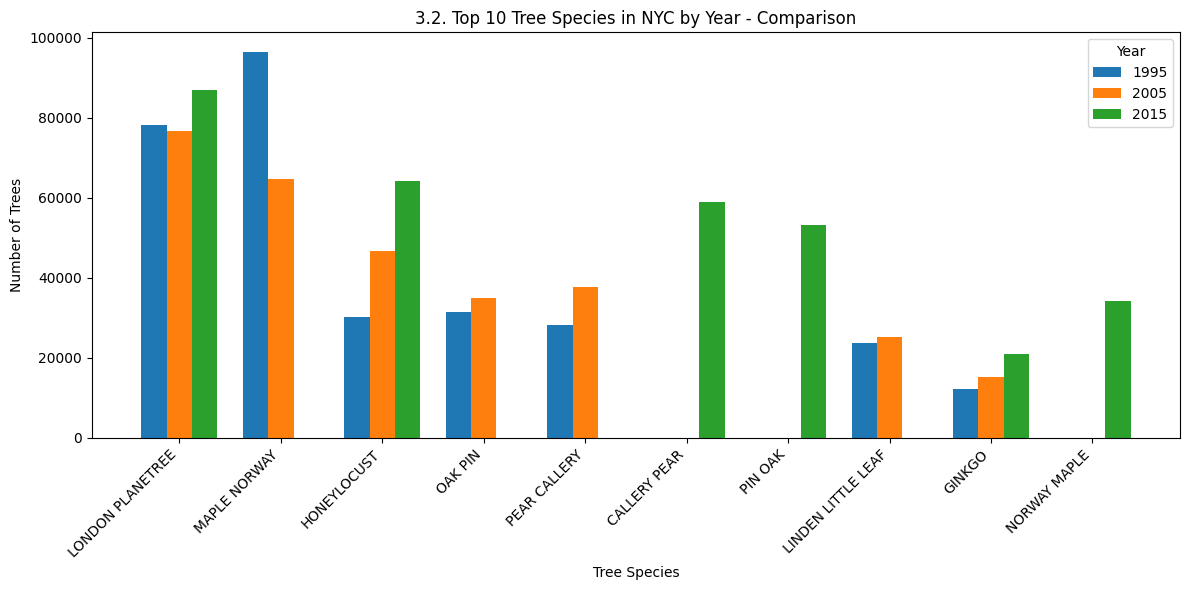

In [8]:
dfs = {year: pd.read_csv(data[year]) for year in years}

df_all = pd.concat(dfs.values(), ignore_index=True)

top10_species = (
    df_all["spc_common"]
    .dropna()
    .loc[lambda x: x.str.strip() != ""]
    .value_counts()
    .head(10)
    .index
)

top10_species_yearly = {
    year: dfs[year]["spc_common"].value_counts().reindex(top10_species, fill_value=0)
    for year in years
}

top10_table = pd.DataFrame({
    "Species": top10_species,
    "1995": df95["spc_common"].value_counts().reindex(top10_species, fill_value=0).values,
    "2005": df05["spc_common"].value_counts().reindex(top10_species, fill_value=0).values,
    "2015": df15["spc_common"].value_counts().reindex(top10_species, fill_value=0).values,
})
print("Top 10 Tree Species in NYC by Year:\n", top10_table)

plt.figure(figsize=(12, 6))

bar_width = 0.25
indices = np.arange(len(top10_species))

for i, year in enumerate(years):
    plt.bar(
        indices + i * bar_width,
        top10_species_yearly[year].values,
        width=bar_width,
        label=str(year)
    )

plt.title("3.2. Top 10 Tree Species in NYC by Year - Comparison")
plt.xlabel("Tree Species")
plt.ylabel("Number of Trees")

plt.xticks(
    indices + bar_width,
    top10_species,
    rotation=45,
    ha="right"
)

plt.legend(title="Year")
plt.tight_layout()

plt.show()

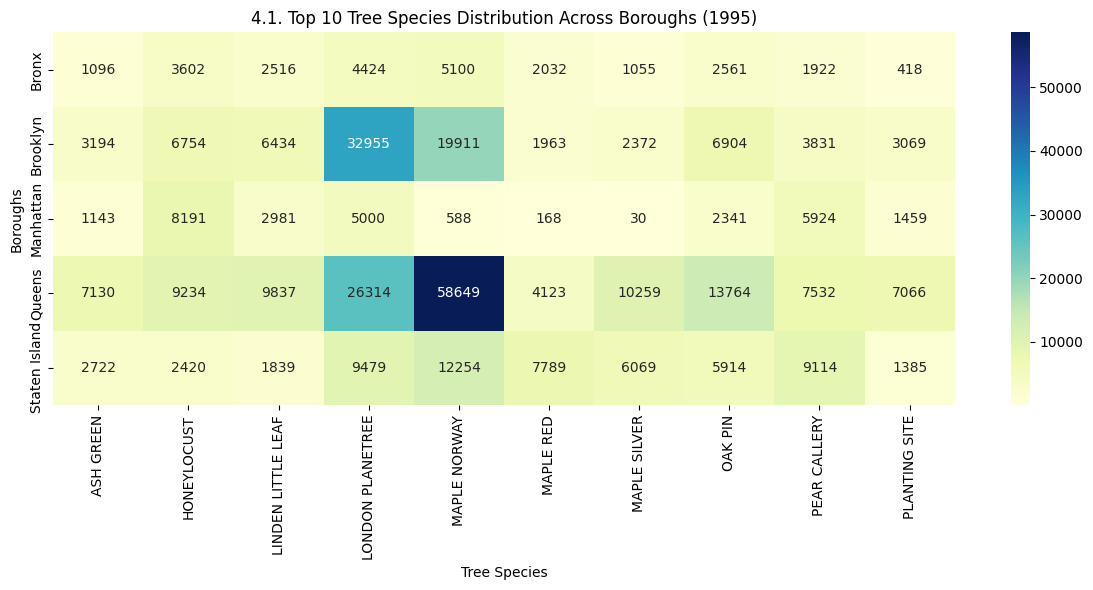

In [9]:
top10_species = df95['spc_common'].value_counts().nlargest(10).index.tolist()
df95_top10 = df95[df95['spc_common'].isin(top10_species)]

pivot_table = df95_top10.pivot_table(
    index='borough', 
    columns='spc_common', 
    values='tree_id',
    aggfunc='count', 
    fill_value=0
)

pivot_table = pivot_table.astype(int)

plt.figure(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('4.1. Top 10 Tree Species Distribution Across Boroughs (1995)')
plt.xlabel('Tree Species')
plt.ylabel('Boroughs')

plt.tight_layout()

plt.show()

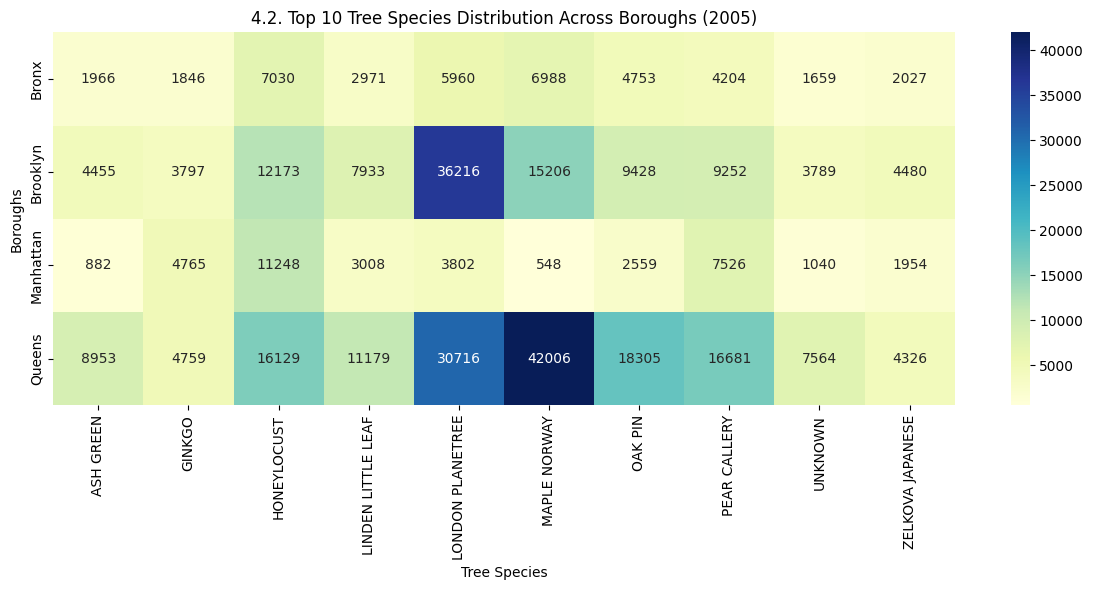

In [10]:
top10_species = df05['spc_common'].value_counts().nlargest(10).index.tolist()
df05_top10 = df05[df05['spc_common'].isin(top10_species)]

pivot_table = df05_top10.pivot_table(
    index='borough', 
    columns='spc_common', 
    values='tree_id',
    aggfunc='count', 
    fill_value=0
)

pivot_table = pivot_table.astype(int)

plt.figure(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('4.2. Top 10 Tree Species Distribution Across Boroughs (2005)')
plt.xlabel('Tree Species')
plt.ylabel('Boroughs')

plt.tight_layout()

plt.show()

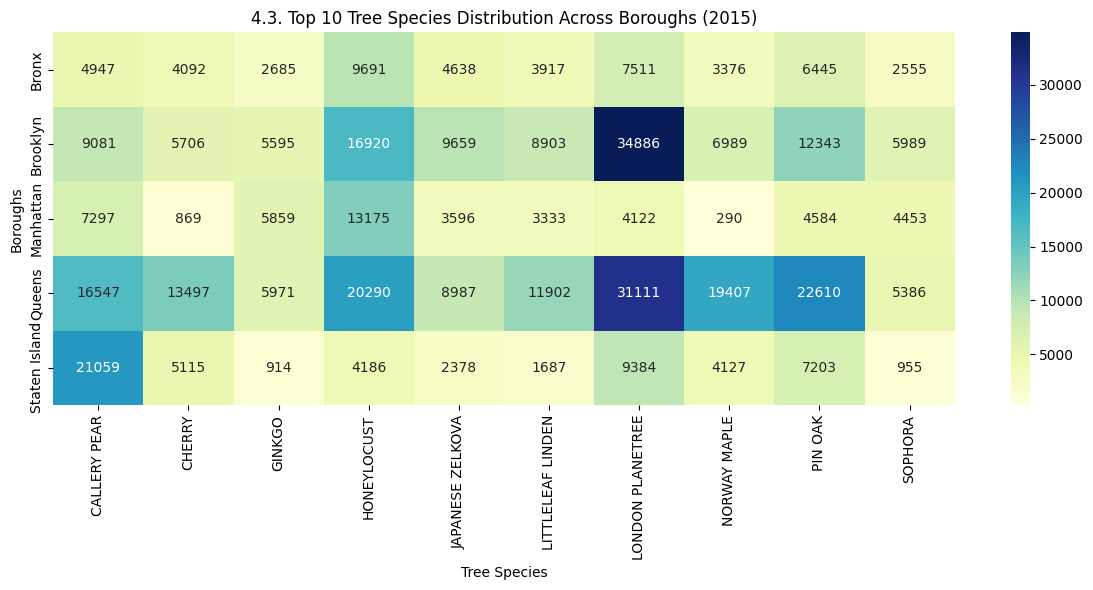

In [11]:
top10_species = df15['spc_common'].value_counts().nlargest(10).index.tolist()
df15_top10 = df15[df15['spc_common'].isin(top10_species)]

pivot_table = df15_top10.pivot_table(
    index='borough', 
    columns='spc_common', 
    values='tree_id',
    aggfunc='count', 
    fill_value=0
)

pivot_table = pivot_table.astype(int)

plt.figure(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('4.3. Top 10 Tree Species Distribution Across Boroughs (2015)')
plt.xlabel('Tree Species')
plt.ylabel('Boroughs')

plt.tight_layout()

plt.show()

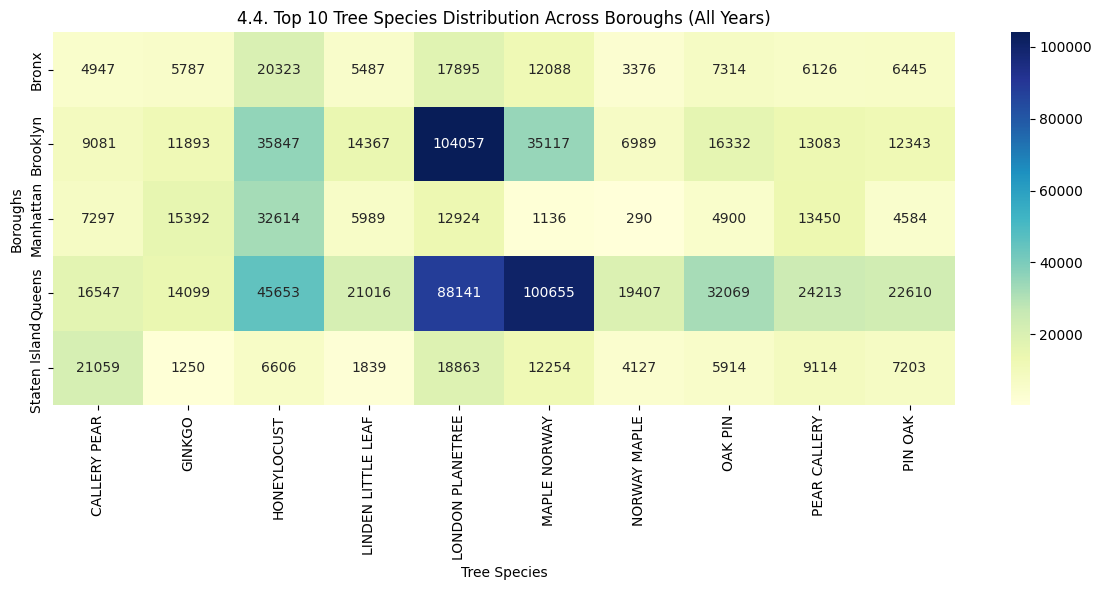

In [12]:
counts = df_all['spc_common'].value_counts().head(10)
top10_species = counts.index

df_all_top10 = df_all[df_all['spc_common'].isin(top10_species)]

pivot_table = df_all_top10.pivot_table(
    index='borough', 
    columns='spc_common', 
    values='tree_id',
    aggfunc='count', 
    fill_value=0
)

pivot_table = pivot_table.astype(int)

plt.figure(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('4.4. Top 10 Tree Species Distribution Across Boroughs (All Years)')
plt.xlabel('Tree Species')
plt.ylabel('Boroughs')

plt.tight_layout()

plt.show()

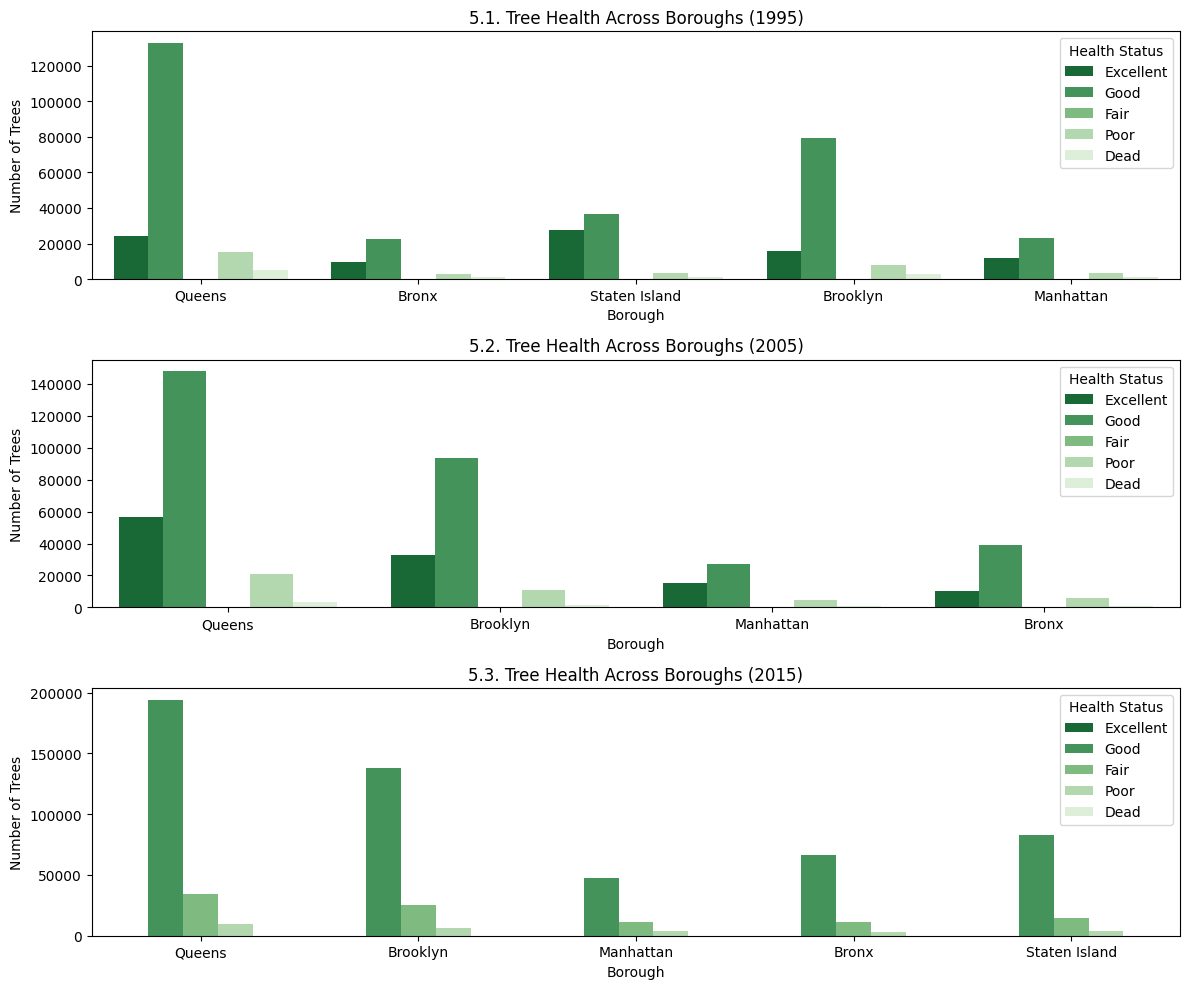

In [13]:
health_order = ["Excellent", "Good", "Fair", "Poor", "Dead"]

df95_health = df95[df95['health'].isin(health_order)]
df05_health = df05[df05['health'].isin(health_order)]
df15_health = df15[df15['health'].isin(health_order)]

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.countplot(data=df95_health, x='borough', hue='health', hue_order=health_order, palette='Greens_r', ax=axes[0])
axes[0].set_title('5.1. Tree Health Across Boroughs (1995)')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Number of Trees')

sns.countplot(data=df05_health, x='borough', hue='health', hue_order=health_order, palette='Greens_r', ax=axes[1])
axes[1].set_title('5.2. Tree Health Across Boroughs (2005)')
axes[1].set_xlabel('Borough')
axes[1].set_ylabel('Number of Trees')

sns.countplot(data=df15_health, x='borough', hue='health', hue_order=health_order, palette='Greens_r', ax=axes[2])
axes[2].set_title('5.3. Tree Health Across Boroughs (2015)')
axes[2].set_xlabel('Borough')
axes[2].set_ylabel('Number of Trees')

for ax in axes:
    ax.legend(title='Health Status')

plt.tight_layout()

plt.show()

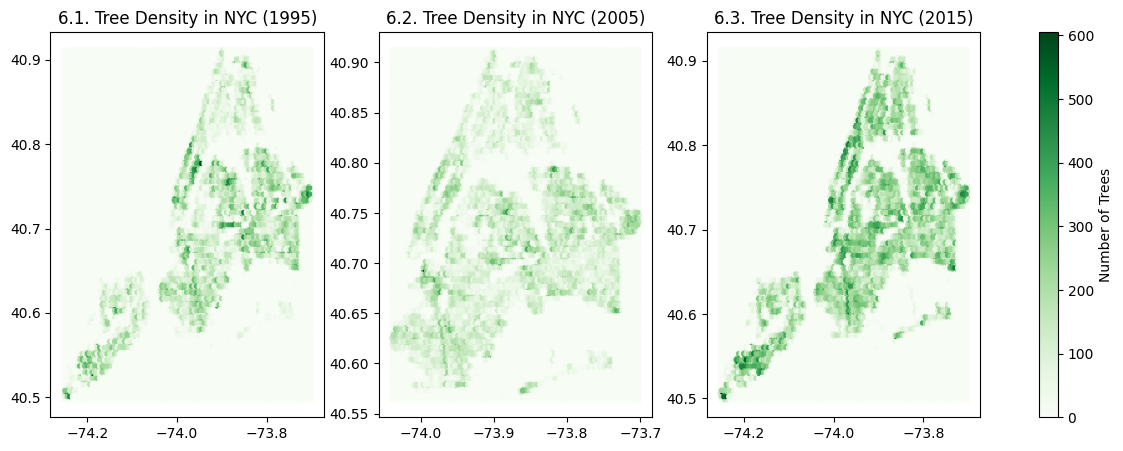

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

hb1 = axes[0].hexbin(df95['longitude'], df95['latitude'], gridsize=100, cmap='Greens')
axes[0].set_title('6.1. Tree Density in NYC (1995)')

hb2 = axes[1].hexbin(df05['longitude'], df05['latitude'], gridsize=100, cmap='Greens')
axes[1].set_title('6.2. Tree Density in NYC (2005)')

hb3 = axes[2].hexbin(df15['longitude'], df15['latitude'], gridsize=100, cmap='Greens')
axes[2].set_title('6.3. Tree Density in NYC (2015)')

cbar = fig.colorbar(hb3, ax=axes, label='Number of Trees')

plt.show()

Top 10 tree problems in NYC (2015):
 problems
Stones                95671
BranchLights          29452
StonesBranchLights    17808
RootOther             11418
TrunkOther            11143
BranchOther            8352
StonesTrunkOther       5183
StonesRootOther        4468
WiresRope              4095
StonesBranchOther      3786
Name: count, dtype: int64


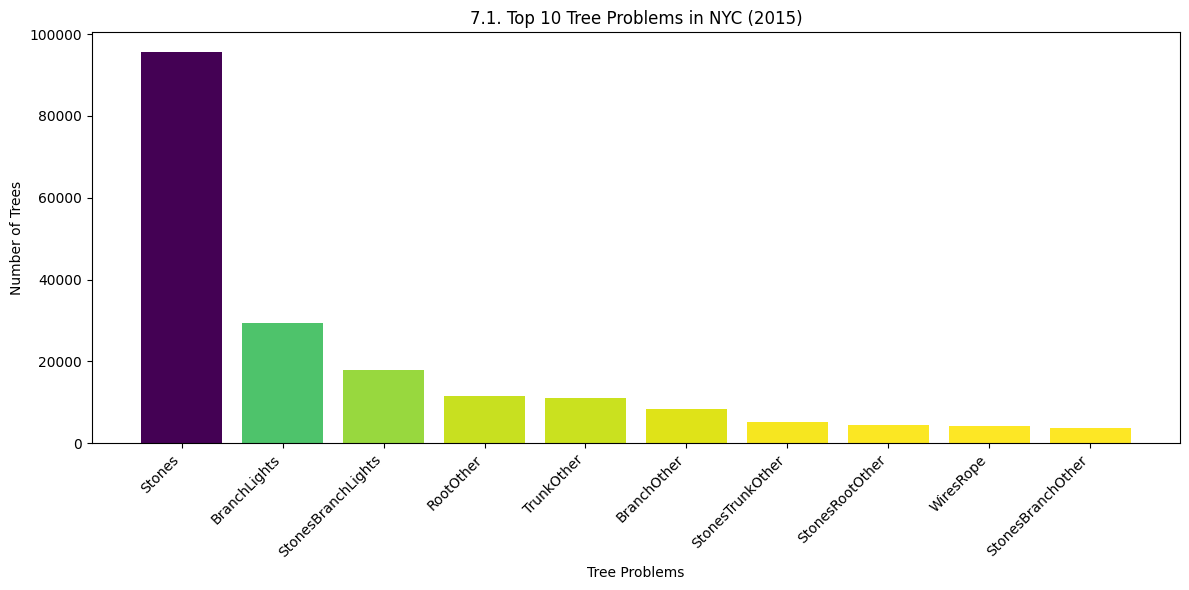

In [15]:
df_problems = df15.copy()
df_problems = df_problems[df_problems["problems"] != "NoProblems"]

problem_counts = df_problems['problems'].value_counts().head(10)
top10_species = problem_counts.index
print("Top 10 tree problems in NYC (2015):\n", problem_counts)

cmap = plt.cm.viridis_r
norm = plt.Normalize(problem_counts.min(), problem_counts.max())
colors = cmap(norm(problem_counts.values))

plt.figure(figsize=(12, 6))

plt.bar(top10_species, problem_counts.values, color=colors)
plt.title('7.1. Top 10 Tree Problems in NYC (2015)')
plt.xlabel('Tree Problems')
plt.ylabel('Number of Trees')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

Top 10 NTAs with tree problems in NYC (2015):
 nta_name
Ridgewood                                         4162
Jackson Heights                                   3486
Bayside-Bayside Hills                             3439
Forest Hills                                      3322
Flatlands                                         3026
Georgetown-Marine Park-Bergen Beach-Mill Basin    2973
Middle Village                                    2876
Canarsie                                          2794
East New York                                     2736
Park Slope-Gowanus                                2669
Name: count, dtype: int64


C:\Users\radek\AppData\Local\Temp\ipykernel_6828\2107146360.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tree Problems', bbox_to_anchor=(1.05, 1), loc='upper left')


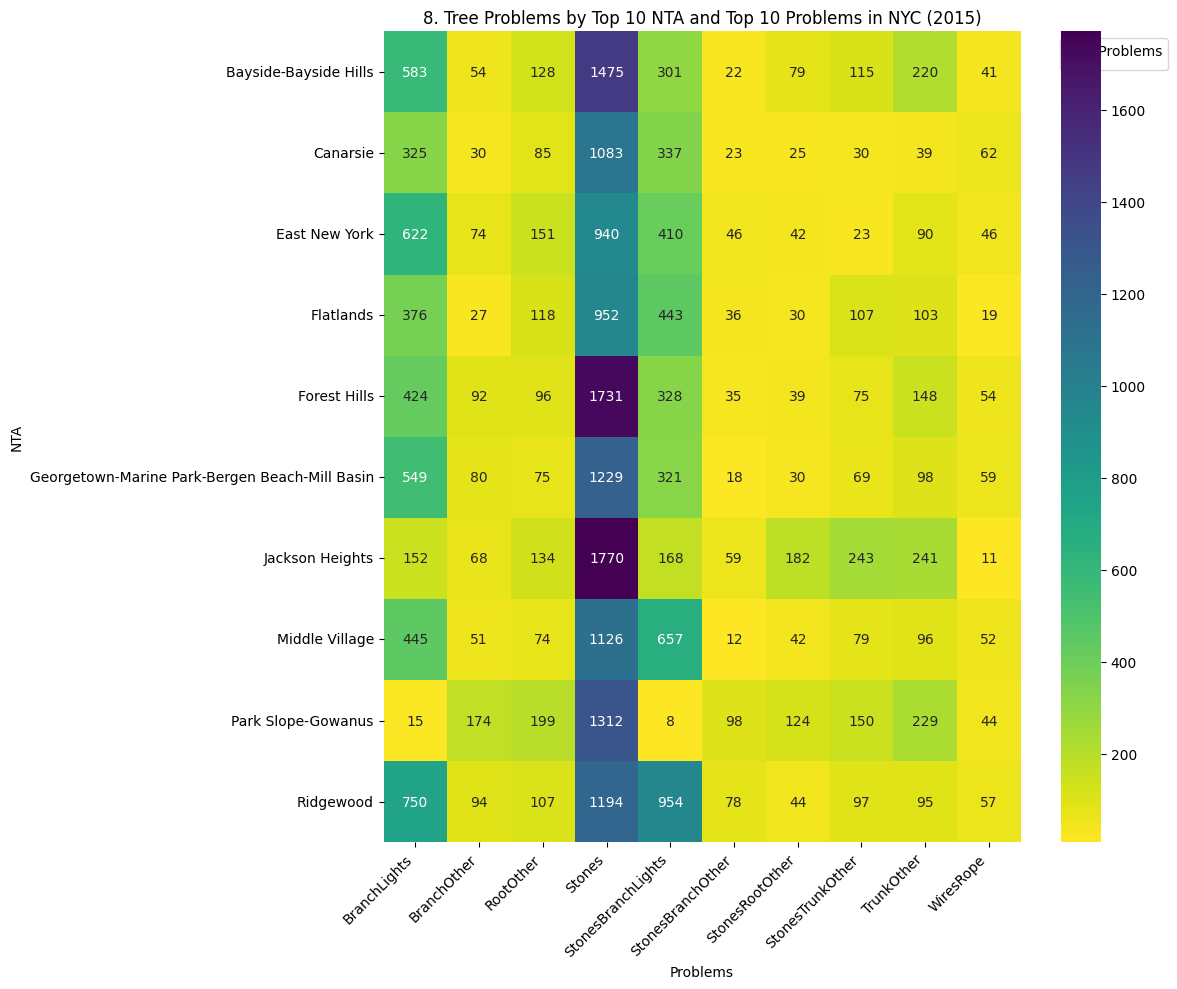

In [16]:
nta_counts = df_problems['nta_name'].value_counts().head(10)
top10_nta = nta_counts.index
print("Top 10 NTAs with tree problems in NYC (2015):\n", nta_counts)

problem_counts = df_problems['problems'].value_counts().head(10)
top10_problems = problem_counts.index

df_top = df_problems[
    (df_problems['nta_name'].isin(top10_nta)) &
    (df_problems['problems'].isin(top10_problems))
]

plt.figure(figsize=(12, 10))

sns.heatmap(pd.crosstab(df_top['nta_name'], df_top['problems']), annot=True, fmt='d', cmap='viridis_r')
plt.title('8. Tree Problems by Top 10 NTA and Top 10 Problems in NYC (2015)')
plt.xlabel('Problems')
plt.ylabel('NTA')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Tree Problems', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


C:\Users\radek\AppData\Local\Temp\ipykernel_8452\3059670767.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dbh_count = df_all.groupby('census_year').apply(


   census_year     > 0    > 20  > 40  > 60  > 80  > 100  > 120  > 160  > 200
0         1995  435532   69489  1153    60     4      0      0      0      0
1         2005  470500   92433  3639   807   322     79     29     13     10
2         2015  651944  100848  2485   150    83     67     55     34     20


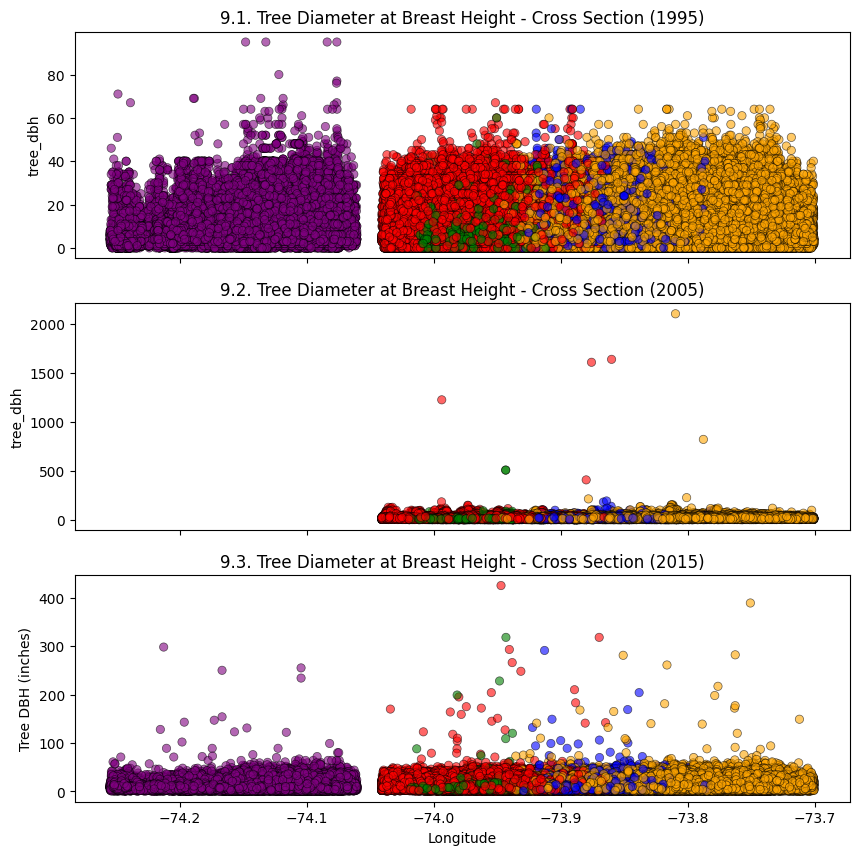

In [3]:
# Display the count of trees in each DBH category for each census year
thresholds = [0, 20, 40, 60, 80, 100, 120, 160, 200]

dbh_count = df_all.groupby('census_year').apply(
    lambda x: pd.Series({f'> {t}': (x['tree_dbh'] > t).sum() for t in thresholds})
).reset_index()

print(dbh_count)

# Tree Diameter at Breast Height (DBH) - Cross Section (Scatter Plots)
datasets = [
    (df95, "1995"),
    (df05, "2005"),
    (df15, "2015")
]

borough_colors = {
    'Manhattan': 'green',
    'Brooklyn': 'red',
    'Queens': 'orange',
    'Bronx': 'blue',
    'Staten Island': 'purple'
}

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

for i, (df, year) in enumerate(datasets):
    sns.scatterplot(
        data=df,
        x='longitude',
        y='tree_dbh',
        hue='borough',
        palette=borough_colors,
        alpha=0.6,
        edgecolor='black',
        linewidth=0.5,
        ax=axes[i]
    )
    axes[i].legend_.remove()

axes[0].set_title(f"9.1. Tree Diameter at Breast Height - Cross Section (1995)")
axes[1].set_title(f"9.2. Tree Diameter at Breast Height - Cross Section (2005)")
axes[2].set_title(f"9.3. Tree Diameter at Breast Height - Cross Section (2015)")

axes[-1].set_xlabel("Longitude")
axes[-1].set_ylabel("Tree DBH (inches)")

plt.show()

          user_type   count  percentage
0  TreesCount Staff  282254       43.28
1         Volunteer  207776       31.86
2   NYC Parks Staff  162136       24.86


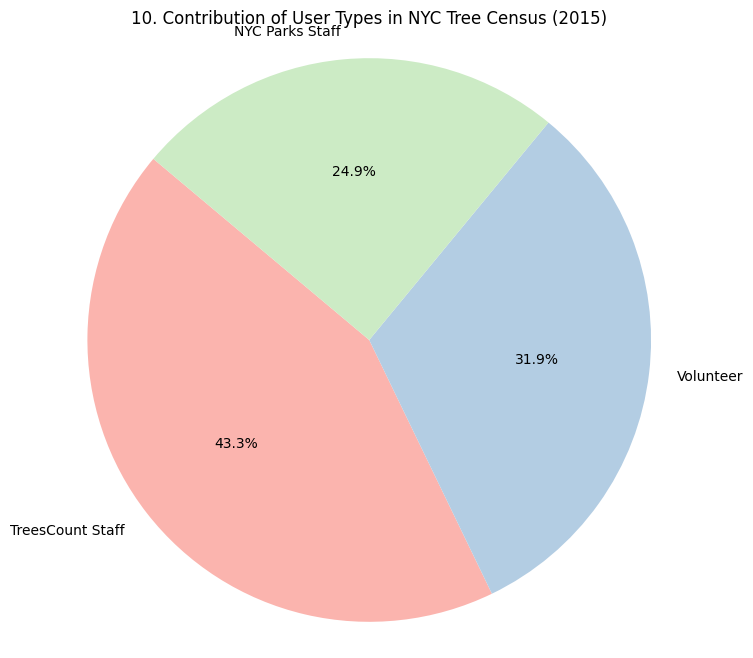

In [18]:
# Display the count and percentage of each user type in the 2015 dataset
user_counts = df15['user_type'].value_counts()
user_percentages = df15['user_type'].value_counts(normalize=True) * 100

user_result = pd.DataFrame({
    'count': user_counts,
    'percentage': user_percentages
}).reset_index().rename(columns={'index': 'user_type'})

user_result['percentage'] = user_result['percentage'].round(2)

print(user_result)

# Pie chart showing the contribution of each user type in the 2015 dataset
plt.figure(figsize=(8, 8))
plt.pie(user_result['percentage'],
        labels=user_result['user_type'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)

plt.title('10. Contribution of User Types in NYC Tree Census (2015)')
plt.axis('equal')

plt.show()